## Additive property of sinusoids

(60,)


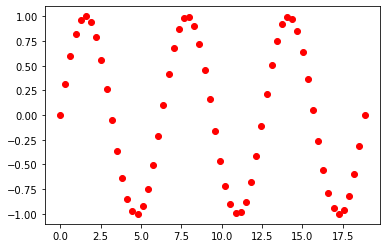

In [140]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np
from IPython.display import HTML
import urllib.request as request
import soundfile as sf
import io
import IPython.display as ipd
from IPython.display import Image

a = 6
t = np.linspace(0,a *np.pi,10*a)
x = np.sin(t)
y=np.zeros((len(t), 2))
y[:,0] = x
y[:,1] = 2*x
print(x.shape)
fig, ax = plt.subplots()
l, = ax.plot([0,a*np.pi],[-1,1], 'o', color='red')

animate = lambda i: l.set_data(t[:i], x[:i])

#ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(t))


#HTML(ani.to_html5_video())
HTML(matplotlib.animation.FuncAnimation(fig, animate, frames=len(t)*a).to_html5_video())

<ipython-input-163-0c97c084c32a>:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(t, y1+y2, 'g')


Text(0, 0.5, 'Amplitude')

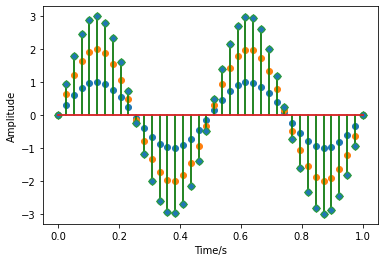

In [163]:
def sinewav(a,f,t):
    return a*np.sin(2*np.pi*f*t)

f = 2
dur = 1
a=1
t = np.linspace(0,dur,f*dur*20, endpoint=True)
y1 = sinewav(a,f, t)
y2 = sinewav(2*a,f, t)

plt.plot(t,y1, 'o')
plt.plot(t,y2, 'o')
plt.stem(t, y1+y2, 'g')
markerline, stemlines, baseline = plt.stem(
    t, y1+y2, linefmt='grey', markerfmt='D', bottom=0.0, use_line_collection=True)
markerline.set_markerfacecolor('none')
plt.xlabel("Time/s")
plt.ylabel("Amplitude")

## Spectrum

Text(0, 0.5, 'Amplitude')

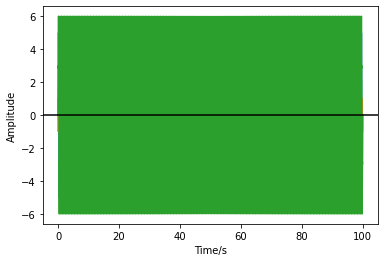

In [175]:
### Fourier Transform: of different frequency
#### FFT
#### IFFT
a1=5
a2=1
f1=2
f2=10
t1 = np.linspace(0,dur,f2*dur*20, endpoint=True)
t2 = np.linspace(0,dur,f2*dur*20, endpoint=True)
y1 = sinewav(a1,f1, t1)
y2 = sinewav(a2,f2, t2)
plt.plot(t1,y1)
plt.plot(t2,y2)
plt.plot(t1, y1+y2)
plt.axhline(y=0.0, color='k', linestyle='-')
plt.xlabel("Time/s")
plt.ylabel("Amplitude")


/Users/shujushi/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


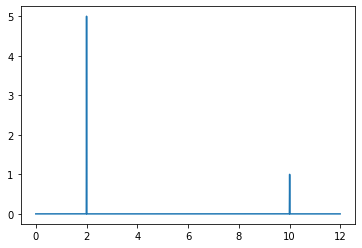

In [176]:
a1=5
a2=1
dur=100
fs = 10000
f1=2
f2=10
t= np.linspace(0,dur, dur*fs, endpoint=True)
y = a1*np.cos(2*np.pi*f1*t) + a2*np.cos(2*np.pi*f2*t)
fft_re = np.fft.fft(y)
x = np.fft.fftfreq(t.shape[-1])*fs
plt.plot(x[0:1200], fft_re[0:1200]/fs*2/dur)

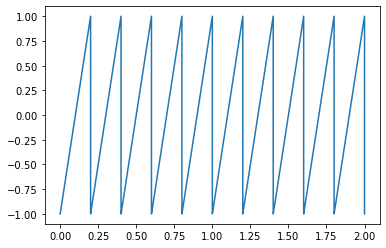

In [180]:
from scipy import signal
fs=44100
f=5
dur=2
a = 1
t= np.linspace(0,dur,dur*fs, endpoint=True)
y= signal.sawtooth(2 * np.pi * f * t)
plt.plot(t,y)
ipd.Audio(y,rate=fs) 

/Users/shujushi/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


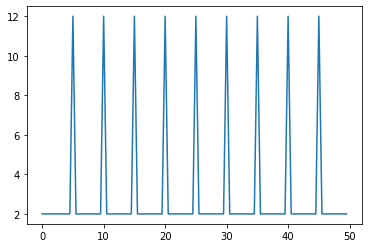

In [181]:
fft_re = np.fft.fft(y)
x = np.fft.fftfreq(t.shape[-1])*fs
plt.plot(x[0:100], -fft_re[0:100])

In [108]:
### Wavefiles of different sound from wikipedia
### Instances of sound wavefiles and the corresponding Spectra

vowel_pathnames = {
        'i' : '9/91/Close_front_unrounded_vowel',
        'ɪ' : '4/4c/Near-close_near-front_unrounded_vowel',
        'e' : '6/6c/Close-mid_front_unrounded_vowel',
        'ɛ' : '7/71/Open-mid_front_unrounded_vowel',
        'æ' : 'c/c9/Near-open_front_unrounded_vowel',
        'u' : '5/5d/Close_back_rounded_vowel',
        'ʊ' : 'd/d5/Near-close_near-back_rounded_vowel',
        'o' : '8/84/Close-mid_back_rounded_vowel',
        'ʌ' : '9/92/Open-mid_back_unrounded_vowel',
        'ɑ' : 'e/e5/Open_back_unrounded_vowel',
        'ə' : 'd/d9/Mid-central_vowel',
        'ɝ' : 'e/e1/En-us-er'
}
    
vowel_waves = {}

for v_ipa,v_pathname in vowel_pathnames.items():
    v_url = 'https://upload.wikimedia.org/wikipedia/commons/{}.ogg'.format(v_pathname)
    try:
        req = request.urlopen(v_url)
    except request.HTTPError:
        print('Unable to download {}'.format(v_url))
    else:
        v_wav,v_fs = sf.read(io.BytesIO(req.read()))
        v_filename = v_pathname[5:] + '.wav'
        sf.write(v_filename,v_wav,v_fs)
        vowel_waves[v_ipa] = v_wav

print('Donwnloaded these phones: {}'.format(vowel_waves.keys()))

Donwnloaded these phones: dict_keys(['i', 'ɪ', 'e', 'ɛ', 'æ', 'u', 'ʊ', 'o', 'ʌ', 'ɑ', 'ə', 'ɝ'])


In [110]:
ipd.Audio(vowel_waves['ɑ'],rate=v_fs)

In [109]:
ipd.Audio(vowel_waves['i'],rate=v_fs)

In [112]:
ipd.Audio(vowel_waves['u'],rate=v_fs)

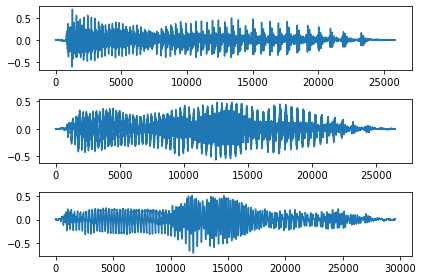

In [116]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
ax1.plot(vowel_waves['ɑ'])
ax2.plot(vowel_waves['i'])
ax3.plot(vowel_waves['u'])
plt.tight_layout()

## F0 and Harmonics

### F0
- In terms of articulation:
- In terms of the acoustics:

### Harmonics
- Harmonics are integer multiples of the fundamental frequency

## Spectrogram

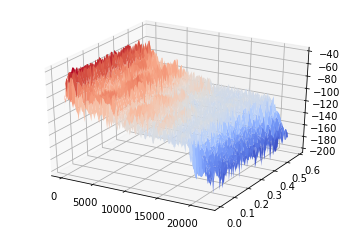

In [139]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy import signal # spectrogram function
from matplotlib import cm # colour map

# basic config
sample_rate = 11240.  # 
sig_len_secs = 10
frequency = 2000.

# generate the signal
timestamps_secs = np.arange(sample_rate*sig_len_secs) / sample_rate
mysignal = np.sin(2.0 * np.pi * frequency * timestamps_secs) 

# extract the spectrum
freq_bins, timestamps, spec = signal.spectrogram(vowel_waves['ɑ'], v_fs)

# 3d plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(freq_bins[:, None], timestamps[None, :], 10.0*np.log10(spec), cmap=cm.coolwarm)
#plt.show()

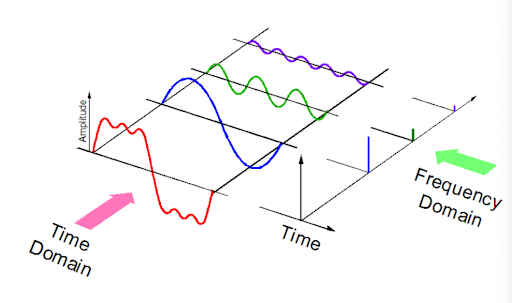

In [144]:
Image(filename = "spectragram.png", width=400, height=400)

## Formants